In [85]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import StratifiedShuffleSplit

In [86]:
data=pd.read_csv("DPD_Att_Classifier.csv")
data.head()

,Directory,File,DesignPattern,Feature_0,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,...,Feature_290,Feature_291,Feature_292,Feature_293,Feature_294,Feature_295,Feature_296,Feature_297,Feature_298,Feature_299
0,111,AbstractFactory,AbstractFactory,0.023346,-0.059852,-0.046176,-0.097405,-0.044382,-0.012018,-0.005196,...,-0.112120,-0.044441,-0.052856,0.090196,0.121308,0.013891,-0.010730,-0.110684,0.001927,-0.065017
1,111,DPAbstractFactory,Unknown,-0.010441,-0.057699,-0.043226,-0.051360,-0.076978,-0.026927,-0.028718,...,-0.114367,-0.098888,-0.042778,0.084722,0.167180,0.040148,-0.095231,-0.020824,-0.011934,-0.075166
2,111,FactoryNotebookGamer,AbstractFactory,-0.024173,-0.085740,-0.110586,-0.093645,-0.067076,-0.074021,-0.015681,...,-0.178159,-0.066261,-0.011634,0.030901,0.066849,0.049524,-0.031129,-0.088362,0.020524,-0.123357
3,111,FactoryNotebookOfficeW,Unknown,-0.009756,-0.040580,-0.070110,-0.109534,-0.032864,-0.052202,0.030639,...,-0.152608,-0.119599,-0.025784,0.095495,0.114170,-0.024063,-0.038113,-0.122671,0.016256,-0.132930
4,111,FactoryProvider,AbstractFactory,-0.053560,-0.034661,-0.000312,-0.008642,-0.062671,-0.077100,-0.033547,...,-0.109249,-0.104436,0.016781,0.051911,0.097571,0.003386,-0.081571,-0.085006,-0.018682,-0.095018


In [87]:
data["DesignPattern"].unique()

array(['AbstractFactory', 'Unknown', nan, 'Facade', 'Adapter', 'Memento',
       'Singleton', 'Proxy', 'Prototype', 'Observer', 'Decorator',
       'FactoryMethod', 'Builder', 'Visitor', 'Strategy'], dtype=object)

In [88]:
data["DesignPattern"].value_counts()

DesignPattern
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Unknown             75
Name: count, dtype: int64

In [89]:
data['DesignPattern'].fillna('Unknown', inplace=True)
data["DesignPattern"].value_counts()

DesignPattern
Unknown            163
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [90]:
import pandas as pd

# Assuming 'data' is your DataFrame with the dataset
unknown_class = data[data['DesignPattern'] == 'Unknown']

# Randomly sample 130 instances from the "Unknown" class
sampled_unknown = unknown_class.sample(n=130, random_state=42)

# Create a DataFrame with the other classes
other_classes = data[data['DesignPattern'] != 'Unknown']

# Concatenate the sampled "Unknown" class with the other classes
data = pd.concat([sampled_unknown, other_classes])

# Now, 'final_dataset' contains only 130 instances of the "Unknown" class

data["DesignPattern"].value_counts()

DesignPattern
Unknown            130
Prototype          127
Observer           127
Strategy           127
Memento            107
Adapter            106
Decorator          105
Singleton          101
Builder            101
FactoryMethod      100
Facade              99
Visitor             98
AbstractFactory     97
Proxy               96
Name: count, dtype: int64

In [91]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'pattern' is the target column
label_encoder = LabelEncoder()
data['pattern_encoded'] = label_encoder.fit_transform(data['DesignPattern'])


In [92]:
y = data['pattern_encoded']
X = data.drop(['DesignPattern', 'pattern_encoded','Directory','File'], axis=1)  # Features

In [93]:
from sklearn.model_selection import train_test_split
# Initialize StratifiedShuffleSplit with a 30% test size
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

# Perform the stratified split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [94]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Initialize different classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}

# Initialize dictionaries to store evaluation metrics
accuracy_scores = {}
precision_scores = {}
recall_scores = {}
f1_scores = {}

# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[name] = accuracy
    
    # Calculate precision (macro-average)
    precision = precision_score(y_test, y_pred, average='macro')
    precision_scores[name] = precision
    
    # Calculate recall (macro-average)
    recall = recall_score(y_test, y_pred, average='macro')
    recall_scores[name] = recall
    
    # Calculate F1-score (macro-average)
    f1 = f1_score(y_test, y_pred, average='macro')
    f1_scores[name] = f1
    
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision (Macro): {precision:.2f}')
    print(f'Recall (Macro): {recall:.2f}')
    print(f'F1-Score (Macro): {f1:.2f}')
    print('-' * 30)


Support Vector Machine Metrics:
Accuracy: 0.86
Precision (Macro): 0.87
Recall (Macro): 0.86
F1-Score (Macro): 0.86
------------------------------
Logistic Regression Metrics:
Accuracy: 0.81
Precision (Macro): 0.82
Recall (Macro): 0.81
F1-Score (Macro): 0.81
------------------------------
Multi-layer Perceptron Metrics:
Accuracy: 0.83
Precision (Macro): 0.84
Recall (Macro): 0.83
F1-Score (Macro): 0.83
------------------------------


In [95]:
from sklearn.metrics import classification_report


# Train and evaluate each classifier
for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    # Print the classification report
    report = classification_report(y_test, y_pred, target_names=["Singleton","Observer","Memento","Proxy","Prototype","Builder","AbstractFactory","FactoryMethod","Facade","Adapter","Decorator","Visitor","Unknown","Strategy"])
    print(f'{name} Classification Report:\n{report}')
    print('-' * 30)


Support Vector Machine Classification Report:
                 precision    recall  f1-score   support

      Singleton       0.88      0.79      0.84        29
       Observer       0.94      0.91      0.92        32
        Memento       0.87      0.90      0.89        30
          Proxy       0.97      0.91      0.94        32
      Prototype       0.94      0.97      0.95        30
        Builder       0.76      0.73      0.75        30
AbstractFactory       0.94      0.94      0.94        32
  FactoryMethod       0.90      0.95      0.92        38
         Facade       0.94      0.82      0.87        38
        Adapter       0.80      0.97      0.88        29
      Decorator       0.81      0.83      0.82        30
        Visitor       0.78      0.95      0.86        38
        Unknown       0.64      0.59      0.61        39
       Strategy       1.00      0.87      0.93        30

       accuracy                           0.86       457
      macro avg       0.87      0.86    

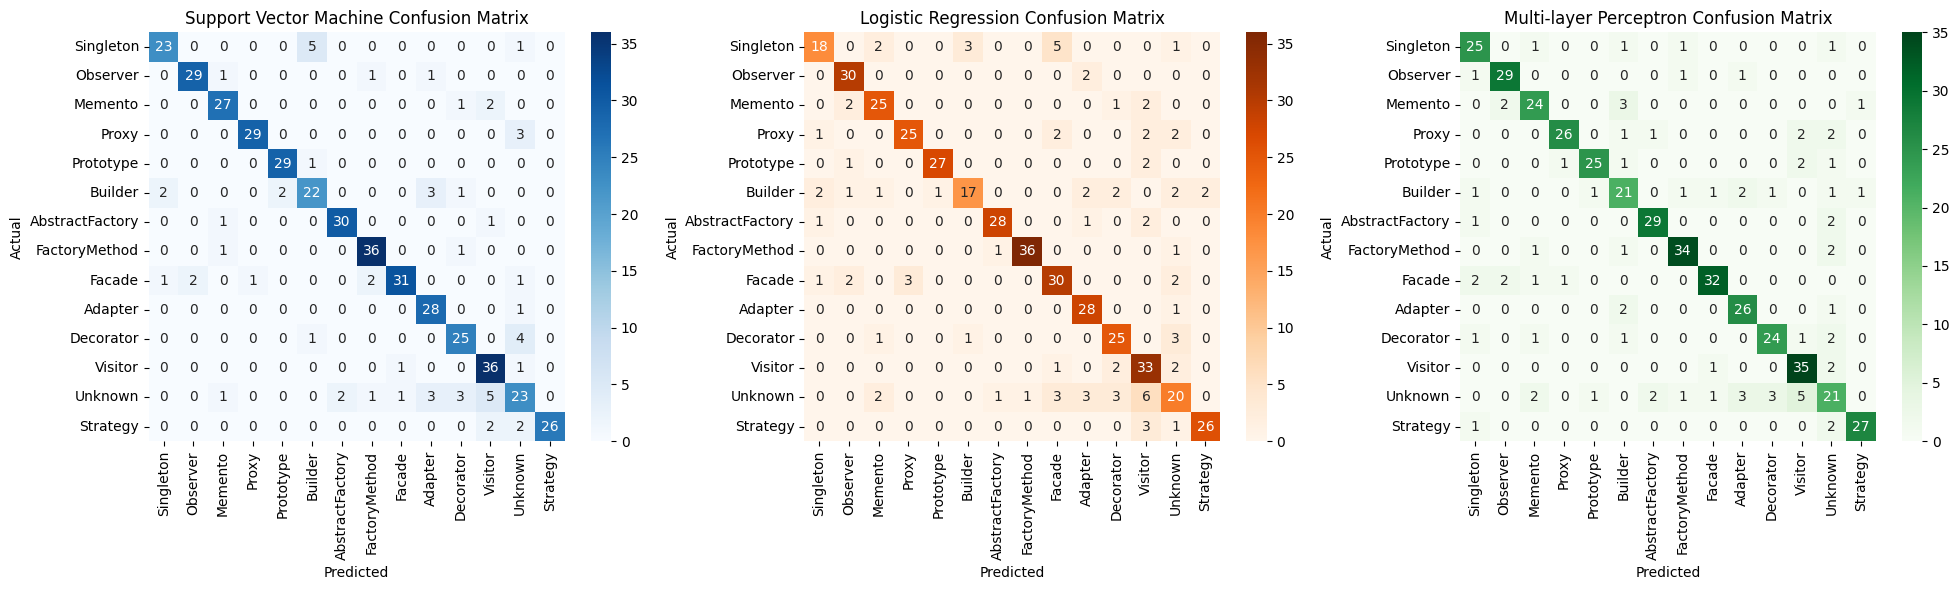

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix


# Initialize the three classifiers
classifiers = {
    'Support Vector Machine': SVC(),
    'Logistic Regression': LogisticRegression(),
    'Multi-layer Perceptron': MLPClassifier(max_iter=1000),
}
colormaps = ['Blues', 'Oranges', 'Greens']

# Create subplots for confusion matrices
fig, axes = plt.subplots(1, 3, figsize=(20, 6))  # Adjust the number of rows and columns as needed

class_labels = ["Singleton", "Observer", "Memento", "Proxy", "Prototype", "Builder", "AbstractFactory", "FactoryMethod", "Facade", "Adapter", "Decorator", "Visitor", "Unknown", "Strategy"]

for i, (name, classifier) in enumerate(classifiers.items()):
    # Train the classifier
    classifier.fit(X_train, y_train)

    # Predict using the classifier
    y_pred = classifier.predict(X_test)

    # Map integer labels to their corresponding string class names
    y_test_str = [class_labels[i] for i in y_test]
    y_pred_str = [class_labels[i] for i in y_pred]

    # Calculate the confusion matrix using the string labels
    cm = confusion_matrix(y_test_str, y_pred_str, labels=class_labels)

    # Create a heatmap for the confusion matrix
    ax = axes[i]
    sns.heatmap(cm, annot=True, fmt='d', cmap=colormaps[i], xticklabels=class_labels, yticklabels=class_labels, ax=ax)
    ax.set_title(f'{name} Confusion Matrix')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')

plt.tight_layout()
plt.show()


In [97]:
from embeddings import encode_java_code
# encode your testing code and transform the embedding tensor to a 2D array


# this is an example of a Factory Method Java code
test= encode_java_code("""
public interface CoffeeShopFactory {
    CoffeeOrder createCoffeeOrder();
}
public class StarbucksFactory implements CoffeeShopFactory {
    @Override
    public CoffeeOrder createCoffeeOrder() {
        return new StarbucksCoffeeOrder();
    }
}
public class DunkinDonutsFactory implements CoffeeShopFactory {
    @Override
    public CoffeeOrder createCoffeeOrder() {
        return new DunkinDonutsCoffeeOrder();
    }
}
public interface CoffeeOrder {
    void prepareCoffee();
}
public class StarbucksCoffeeOrder implements CoffeeOrder {
    @Override
    public void prepareCoffee() {
        System.out.println("Preparing coffee at Starbucks.");
    }
}
public class DunkinDonutsCoffeeOrder implements CoffeeOrder {
    @Override
    public void prepareCoffee() {
        System.out.println("Preparing coffee at Dunkin' Donuts.");
    }
}

""").tolist()
# test is a vector of embeddings , we reshape it to a vector of vectors. Row is a vector of vectors [[]]
row = np.array(test).reshape(1, -1)




In [98]:
predicted_label = classifier.predict(row)
print("Predicted Label:",label_encoder.inverse_transform(predicted_label))


Predicted Label: ['FactoryMethod']


c:\Python\Python310\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(
